In [6]:
import sys
import json
import pandas as pd
print(pd.__version__)

import seaborn as sns
import matplotlib.pyplot as plt

1.4.0


In [7]:
# PATH_TO_PROFILE = 'bsi_zoo/data/benchmark_data_CC120264_fixed.pkl'
PATH_TO_PROFILE_FIXED = '/home/anujanegi/tj/bdsg/BSI-Zoo/bsi_zoo/data/benchmark_data_CC120264_fixed.pkl'
PATH_TO_PROFILE_FREE = '/home/anujanegi/tj/bdsg/BSI-Zoo/bsi_zoo/data/benchmark_data_CC120264_free.pkl'
METRIC_NAMES = ['euclidean_distance', 'mse', 'emd', 'f1']

In [10]:
df_fixed = pd.read_pickle(PATH_TO_PROFILE_FIXED)
df_free = pd.read_pickle(PATH_TO_PROFILE_FREE)
df_results = pd.concat([df_fixed, df_free])
df_results

,estimator,euclidean_distance,mse,emd,f1,alpha,cov_type,n_orient,n_sensors,n_sources,n_times,nnz,orientation_type,path_to_leadfield,estimator__alpha
0,iterative_L1,0.063010,0.000244,0.035116,0.666667,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.20
1,iterative_L1,0.063010,0.000244,0.035116,0.666667,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.10
2,iterative_L1,0.015786,0.000254,0.028052,0.400000,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.01
3,iterative_L1,0.079649,0.000283,0.057779,0.000000,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.20
4,iterative_L1,0.079649,0.000287,0.057779,0.000000,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,gamma_map,0.000000,0.000405,0.032400,0.000853,0.4,full,3,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120264.npz,0.10
146,gamma_map,0.000000,0.000405,0.032400,0.000853,0.4,full,3,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120264.npz,0.01
147,gamma_map,0.000000,0.001376,0.033570,0.000853,0.4,full,3,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120264.npz,0.20
148,gamma_map,0.000000,0.001376,0.033570,0.000853,0.4,full,3,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120264.npz,0.10


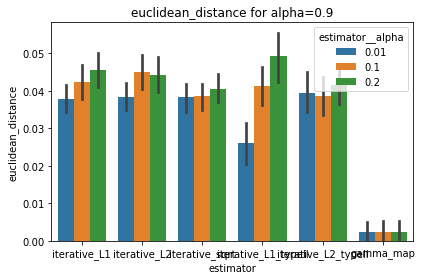

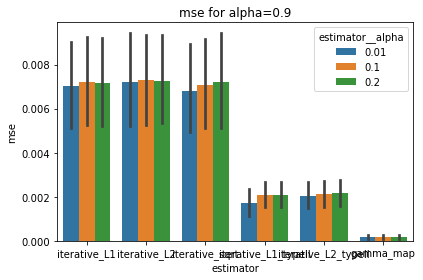

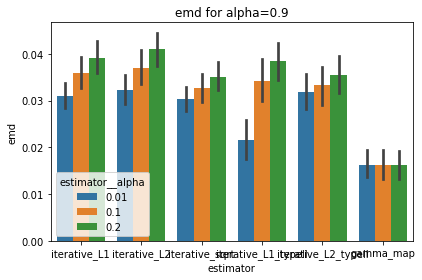

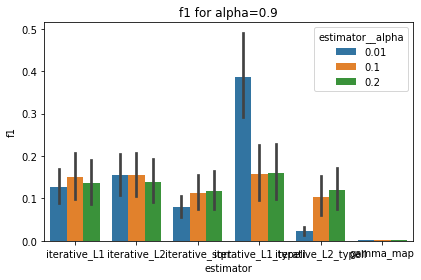

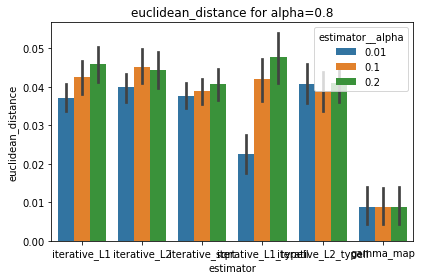

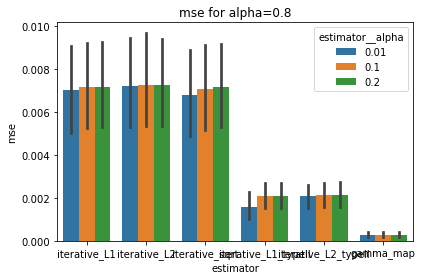

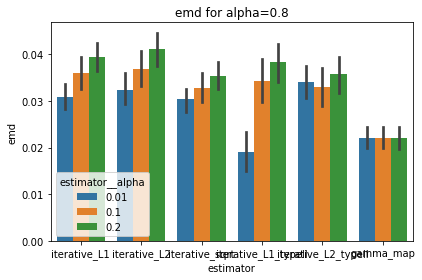

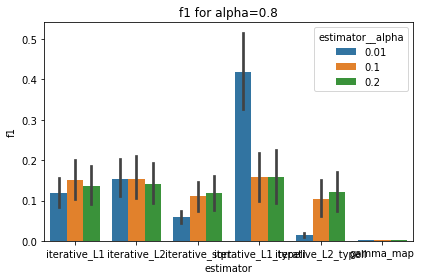

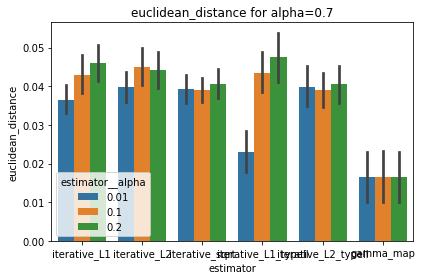

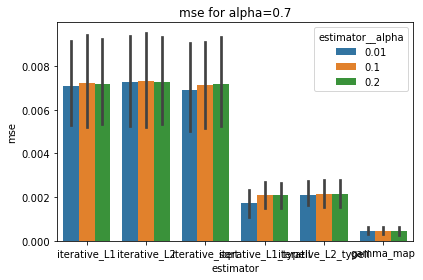

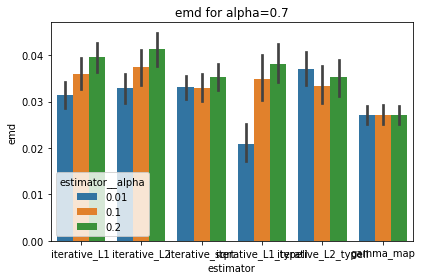

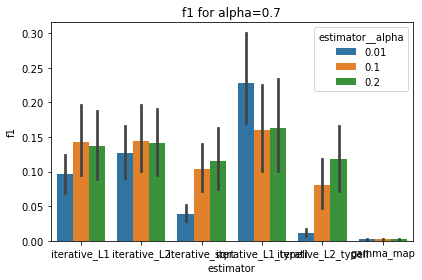

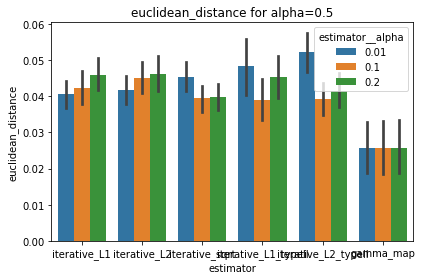

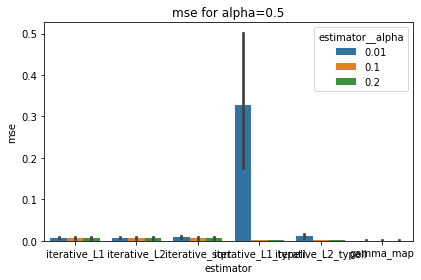

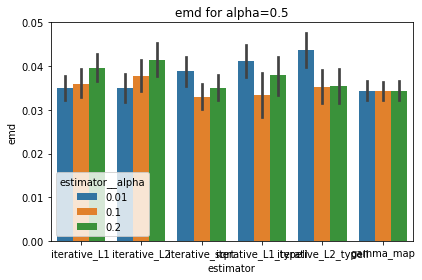

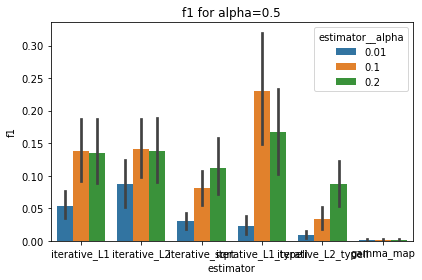

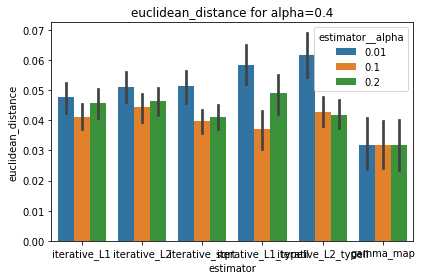

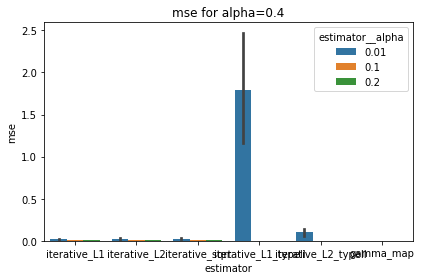

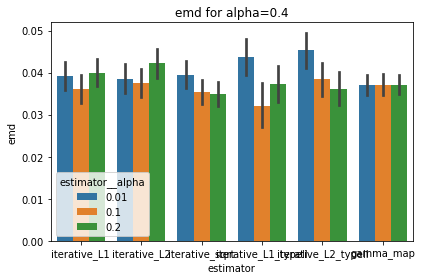

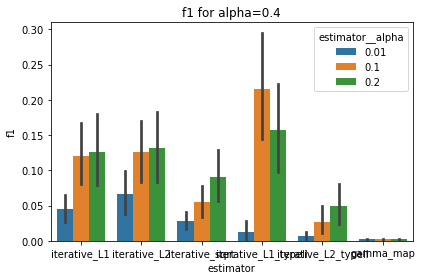

In [11]:
for alpha in df_results["alpha"].unique():
    for metric in METRIC_NAMES:
        this_df_results = df_results[df_results["alpha"] == alpha]
        fig = plt.figure()
        sns.barplot(
            data=this_df_results, x="estimator", y=metric, hue="estimator__alpha"
        )
        plt.title(f"{metric} for alpha={alpha}")
        plt.tight_layout()
        plt.show()
